In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# 데이터 다운로드

In [3]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

# 작가가 많이 존재하는 영화는 대다수가 애니메이션 영화일 것이다.

In [38]:
groupW= writer_data.groupby('item').count().sort_values('writer', ascending=False)

In [28]:
print(title_data[title_data['item']==1907])
print(title_data[title_data['item']==783])
print(title_data[title_data['item']==2687])
print(title_data[title_data['item']==364])
print(title_data[title_data['item']==6889])

print(title_data[title_data['item']==2090])
print(title_data[title_data['item']==5796])
print(title_data[title_data['item']==3964])
print(title_data[title_data['item']==6888])

     item         title
442  1907  Mulan (1998)
      item                                title
3487   783  Hunchback of Notre Dame, The (1996)
     item          title
839  2687  Tarzan (1999)
    item                  title
64   364  Lion King, The (1994)
      item                title
3705  6889  Brother Bear (2003)
      item                 title
3603  2090  Rescuers, The (1977)
      item                 title
5926  5796  Casino Royale (1967)
      item                                           title
3871  3964  Adventures of Ichabod and Mr. Toad, The (1949)
      item                 title
3645  6888  Scary Movie 3 (2003)


-> 작가가 많이 존재하는 영화는 거의 애니메이션 영화임을 추측할 수 있습니다.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writer'>

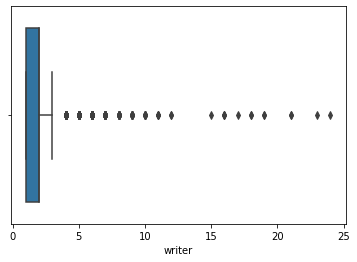

In [41]:
# 영화별 작가 수의 분포도
sns.boxplot(groupW['writer'])

In [42]:
groupW.describe()

,writer
count,5648.000000
mean,2.001771
std,1.546859
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,24.000000


-> 박스의 끝선이 3.5이므로 작가 3명을 기준으로 3명 이하는 작가 수가 적은 영화로, 4명 이상은 작가 수가 많은 영화로 설정한다. 

In [50]:
genre_data

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [65]:
groupW= pd.DataFrame(groupW)
groupW.reset_index(inplace=True)

In [69]:
genreW= pd.merge(groupW, genre_data, on='item', how='right')
genreW.dropna(inplace=True)

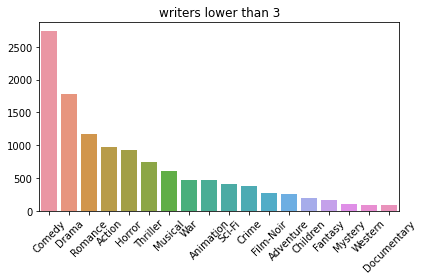

In [90]:
temp= genreW[genreW.writer <= 3]
sns.barplot(x= temp['genre'].unique(), y= temp['genre'].value_counts().values, data=temp)
plt.xticks(rotation=45)
plt.title('writers lower than 3')
plt.tight_layout()

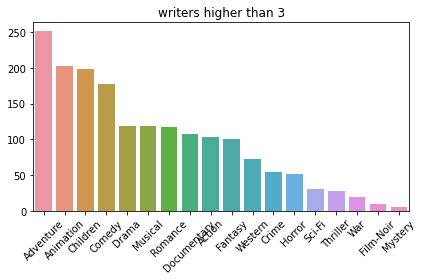

In [91]:
temp= genreW[genreW.writer > 3]
sns.barplot(x= temp['genre'].unique(), y= temp['genre'].value_counts().values, data=temp)
plt.xticks(rotation=45)
plt.title('writers higher than 3')
plt.tight_layout()

- 3명 이하 작가 그래프에서 애니메이션+어드벤처의 위치는 9위 이하이지만, 4명 이상 작가 그래프에선 어드벤처가 1위, 애니메이션이 2위를 차지한다. 
- 즉 작가가 4명이상인 영화는 adventure, animation, children 의 장르를 가진 영화일 확률이 높다.
- 애니메이션 영화의 경우 흥행에 있어서 작가보다는 스타감독, 스타캐릭터, 스토리 등에 영향을 많이 받는다 (from 애니메이션 영화 흥행요인 분석https://www.dbpia.co.kr/Journal/articleDetail?nodeId=NODE01708266)
- 또한 3명 이하의 작가들이 투입된 영화보다 작가 1인당 영화 기여 지분이 적을 것이기 때문에 작가가 영화선택에 미치는 영향이 더 감소할 것이다. 